In [6]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# fetch dataset 
air_quality = fetch_ucirepo(id=360) 
  
# data (as pandas dataframes) 
X = air_quality.data.features 
y = air_quality.data.targets 
  
# metadata 
print(air_quality.metadata) 
  
# variable information 
print(air_quality.variables) 


{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'ID': 420, 'type': 'NATIVE', 'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


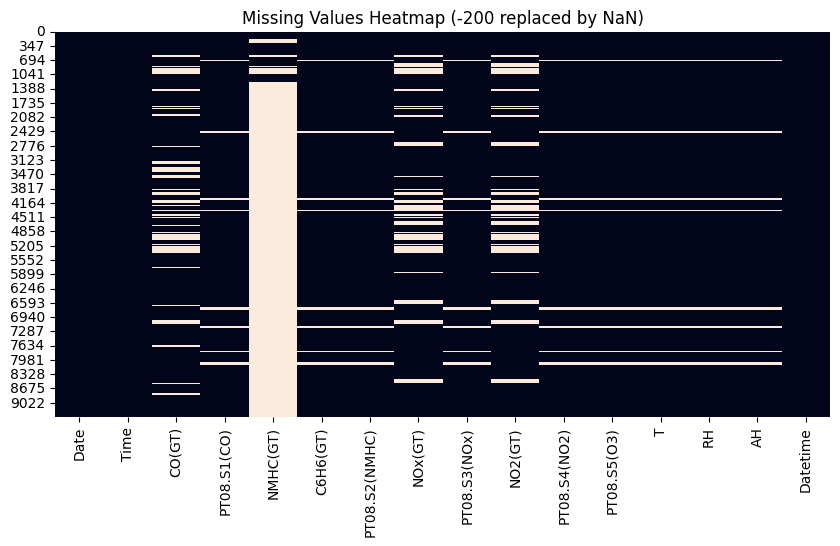

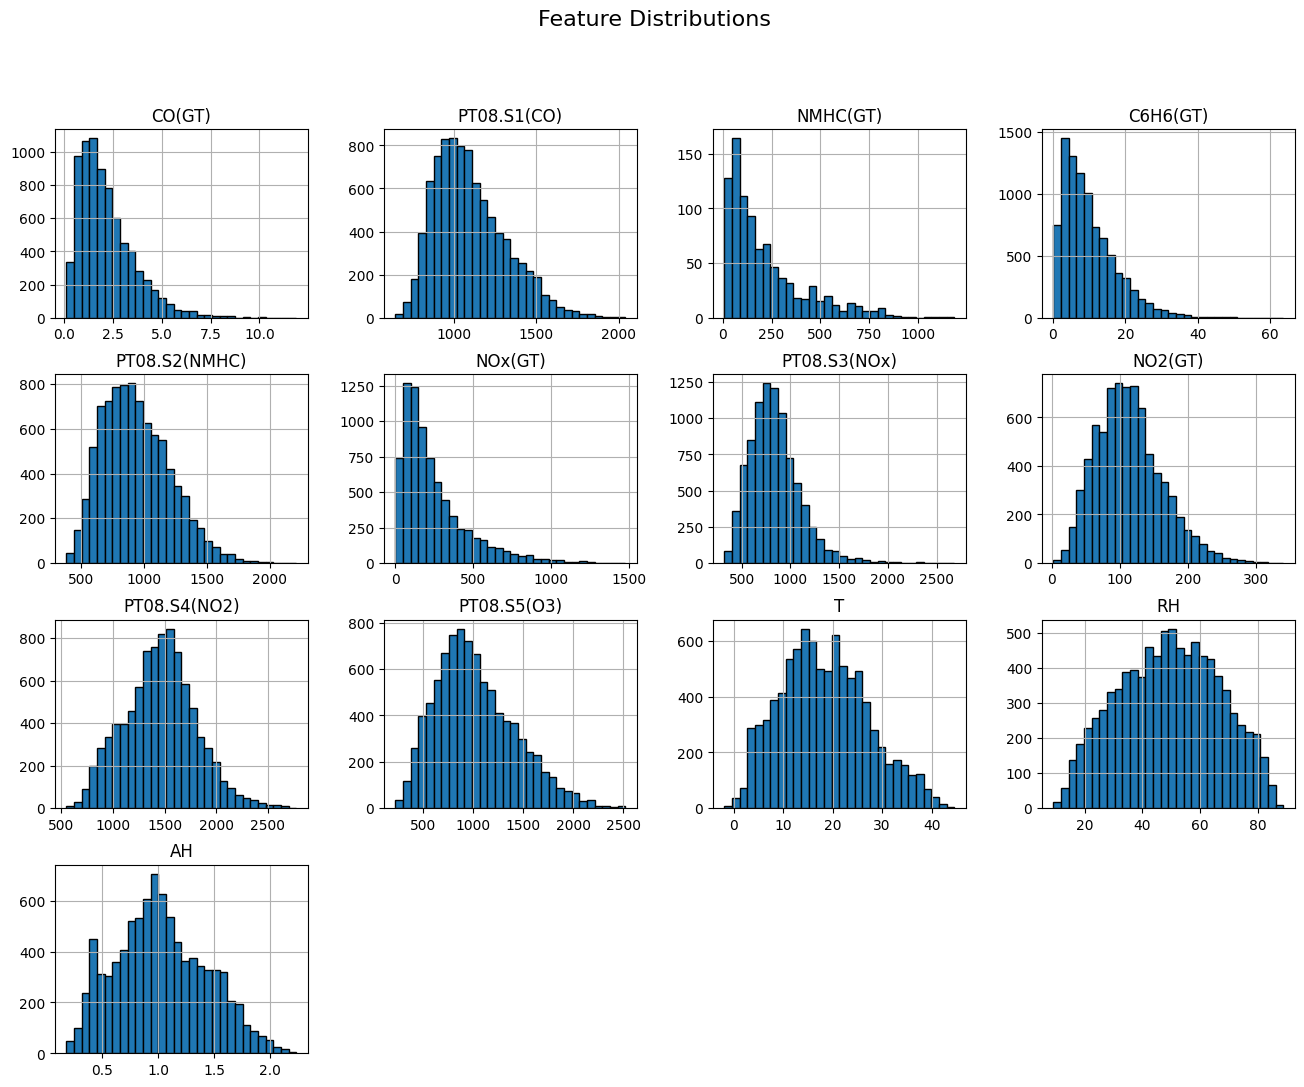

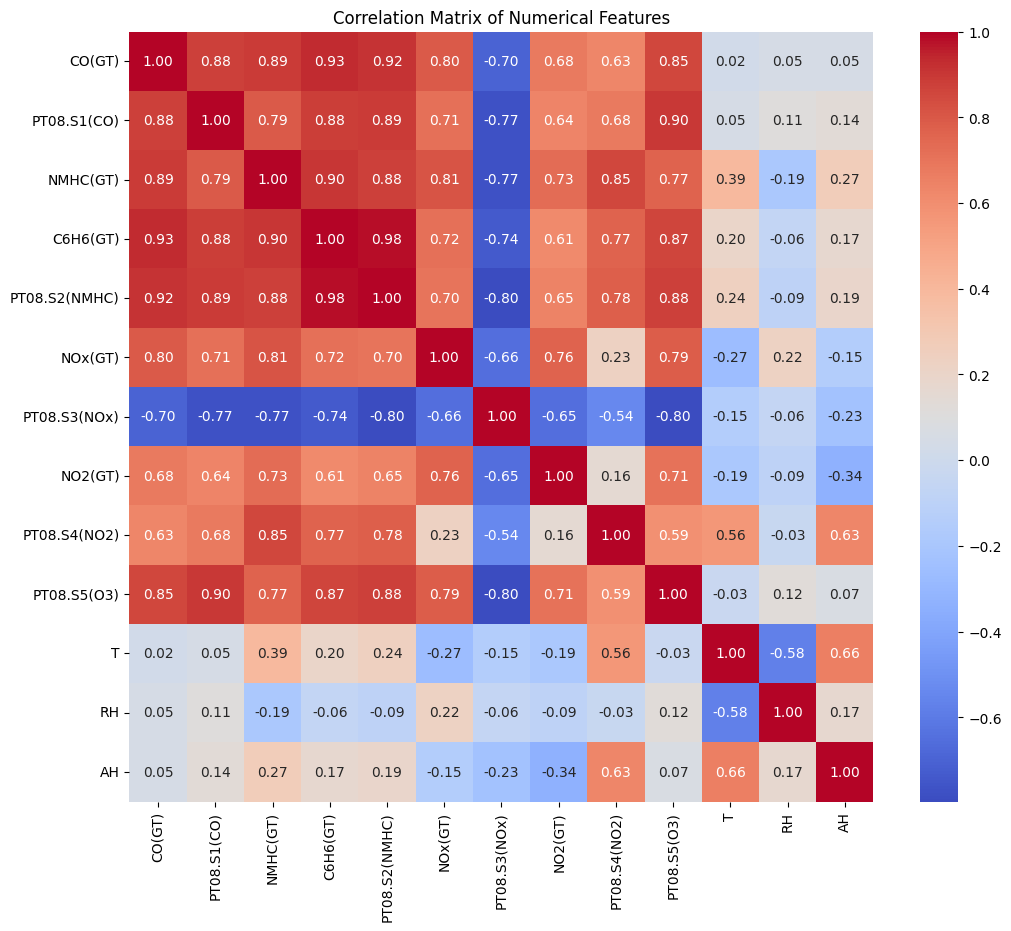

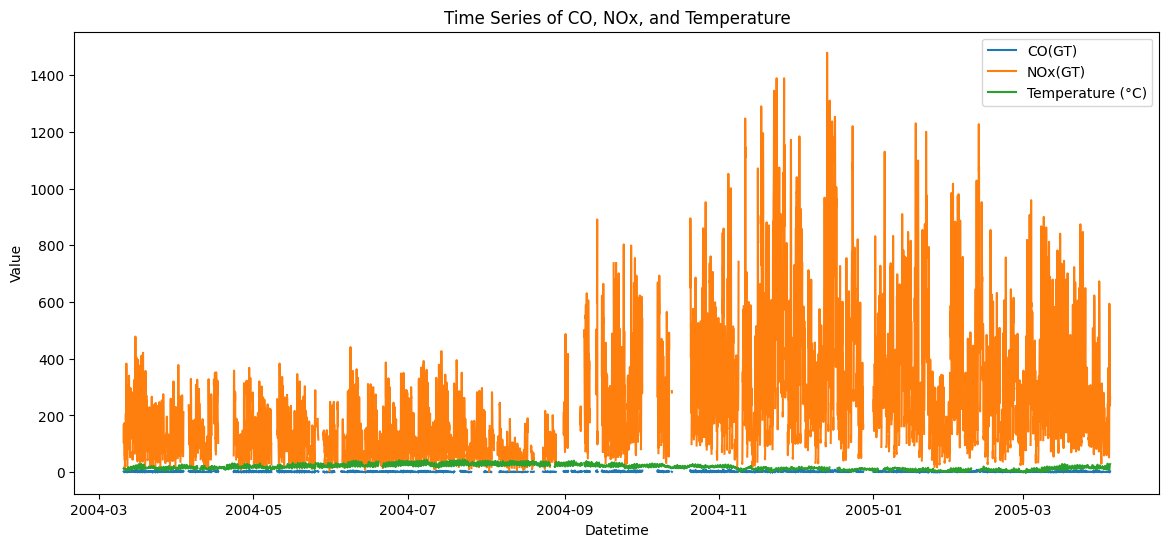

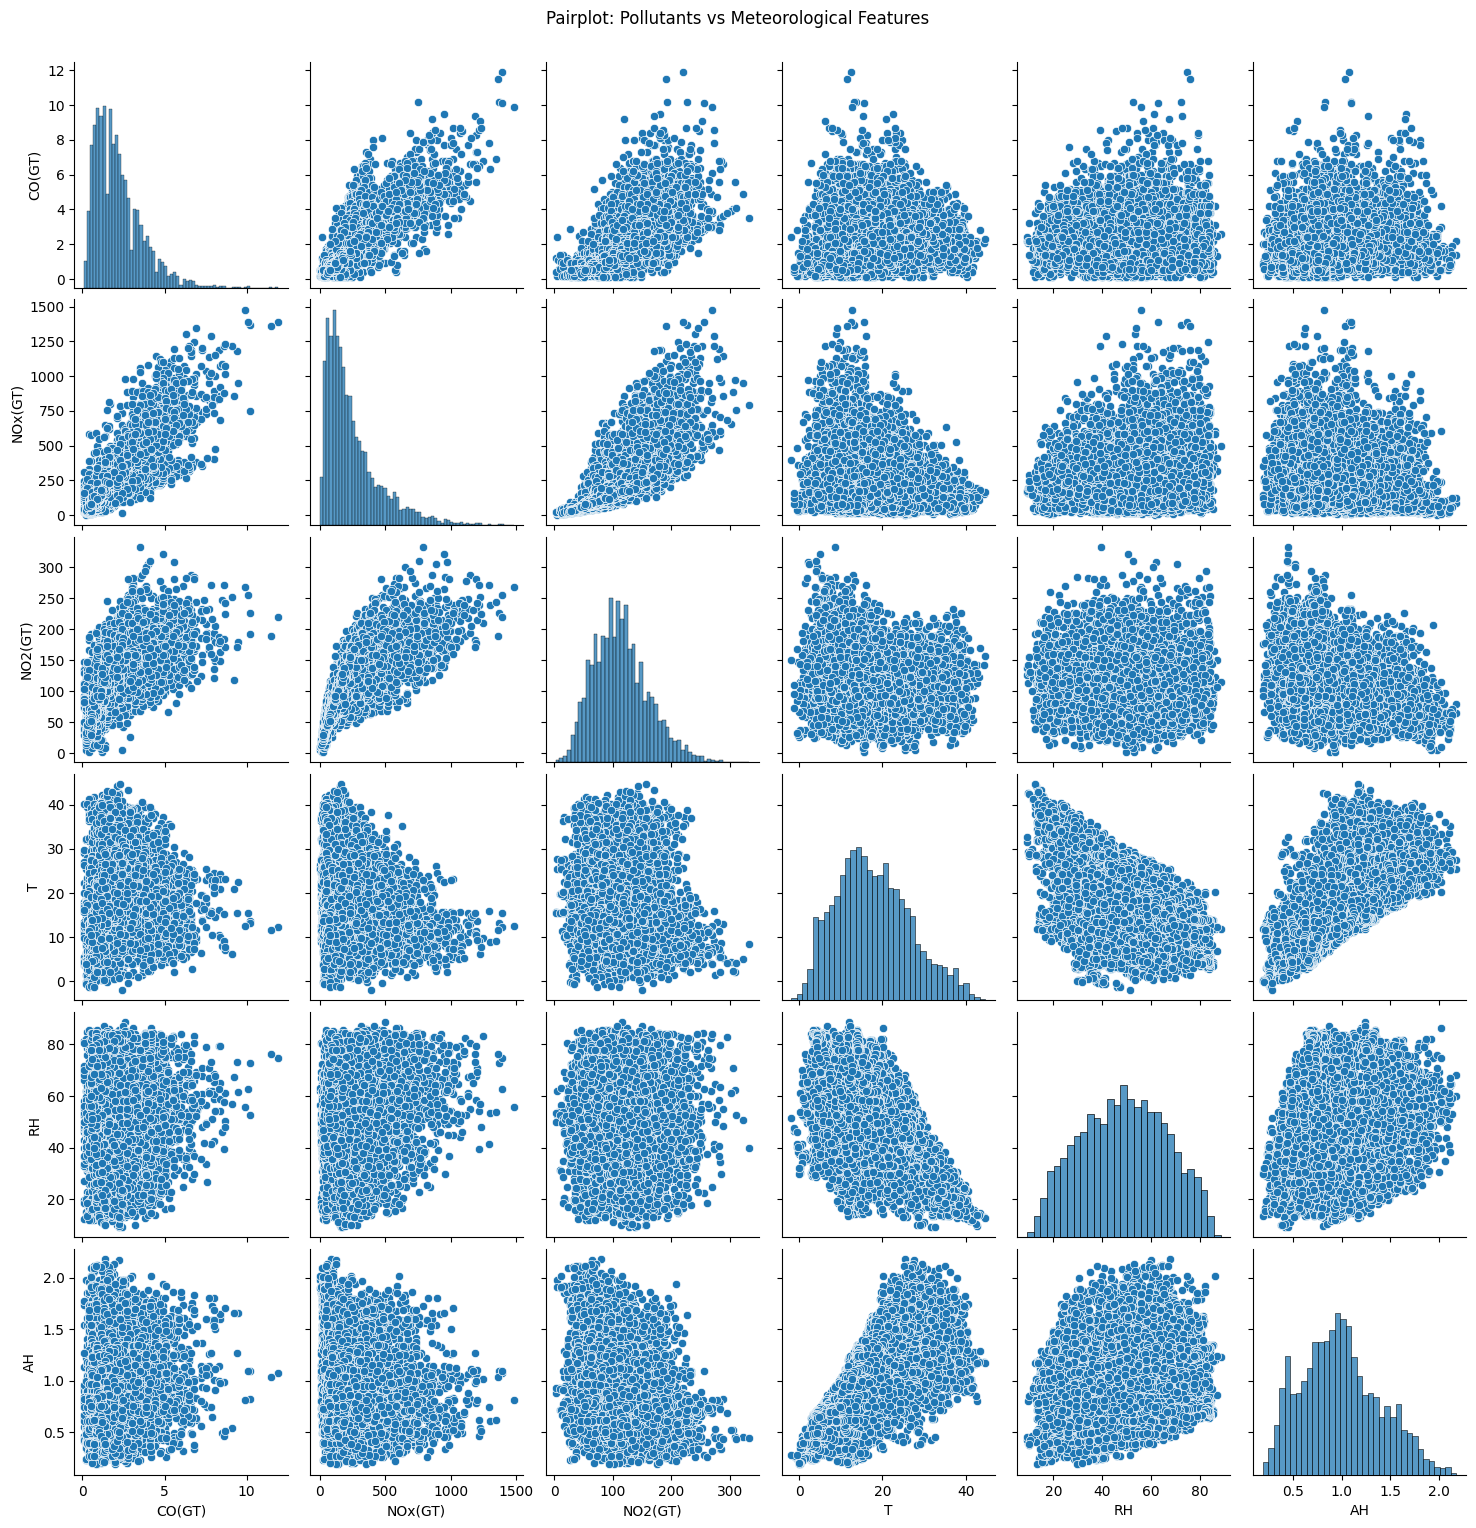

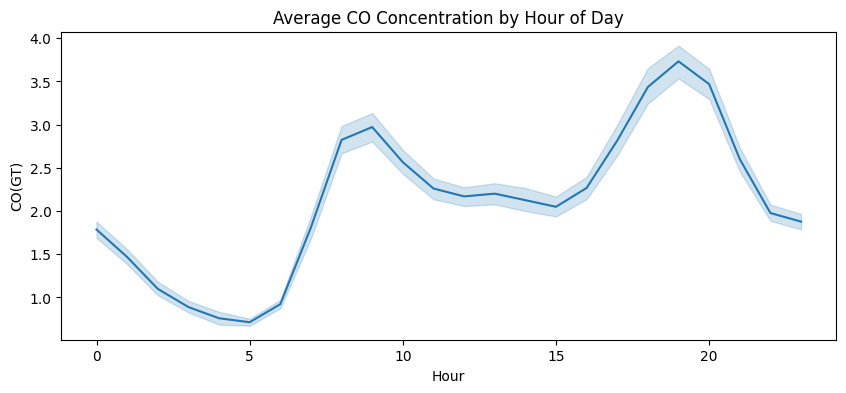

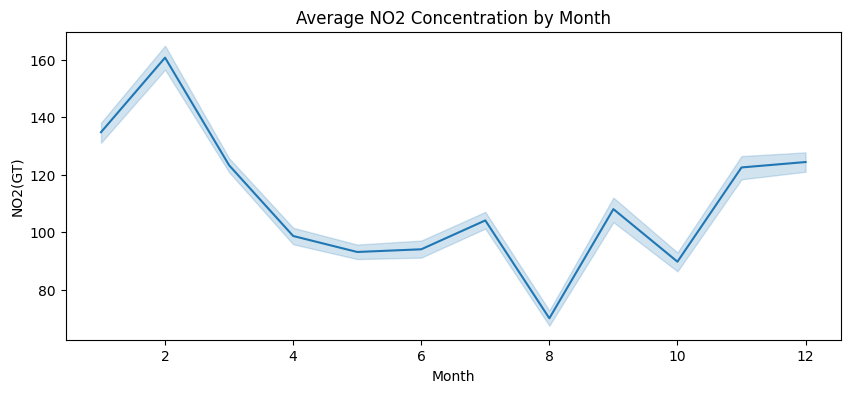

In [ ]:


# 假设 DataFrame 名为 df
# 1. 替换缺失值 (-200)
df = X.replace(-200, np.nan)

# 2. 合并 Date 与 Time 成为 datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df = df.dropna(subset=['Datetime']).sort_values('Datetime')

# 3. 查看缺失值比例
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap (-200 replaced by NaN)")
plt.show()

# 4. 各特征的分布（直方图）
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(figsize=(16,12), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 5. 特征间的相关性
plt.figure(figsize=(12,10))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# 6. 时间序列趋势 (示例: CO, NOx, T)
plt.figure(figsize=(14,6))
plt.plot(df['Datetime'], df['CO(GT)'], label='CO(GT)')
plt.plot(df['Datetime'], df['NOx(GT)'], label='NOx(GT)')
plt.plot(df['Datetime'], df['T'], label='Temperature (°C)')
plt.legend()
plt.title("Time Series of CO, NOx, and Temperature")
plt.xlabel("Datetime")
plt.ylabel("Value")
plt.show()

# 7. Pairplot 探索污染物与气象变量关系
subset_cols = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']
sns.pairplot(df[subset_cols].dropna())
plt.suptitle("Pairplot: Pollutants vs Meteorological Features", y=1.02)
plt.show()

# 8. 周期性趋势（平均每天/每月变化）
df['Hour'] = df['Datetime'].dt.hour
df['Month'] = df['Datetime'].dt.month

plt.figure(figsize=(10,4))
sns.lineplot(x='Hour', y='CO(GT)', data=df, estimator='mean')
plt.title("Average CO Concentration by Hour of Day")
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x='Month', y='NO2(GT)', data=df, estimator='mean')
plt.title("Average NO2 Concentration by Month")
plt.show()



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
 15  Datetime       9357 n